In [2]:
#智联爬取 (五个城市,北京上海杭州前三页)
#boss直聘 拉钩网 脉脉
#数据分析 跟什么有关 占比
# 1. 读取数据
#确立分析工资和什么有关
import pandas as pd
df = pd.read_csv('./数据分析招聘信息.csv')
df

,职位,公司,薪资,位置,年限,学历,公司性质
0,金融数据分析助理,北京融汇天诚投资管理有限公司,15K-20K,北京,3-5年,大专,合资
1,数据分析岗,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,硕士,国企
2,数据分析师,淘数科技(北京)有限公司,6K-12K,北京,1-3年,本科,民营
3,数据及经营分析岗,中国人民人寿保险股份有限公司,薪资面议,北京-朝阳区,1-3年,本科,国企
4,运维开发岗（开发与应用维护方向、运维数据分析方向）,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,本科,国企
...,...,...,...,...,...,...,...
1885,数据分析（数据运营）,成都卡恩特医疗科技有限公司,6K-8K,成都,经验不限,本科,民营
1886,网络数据分析师,成都大运汽车集团有限公司,4K-6K,成都,NaN,大专,民营
1887,数据分析师,成都彩色空间文化传媒有限公司,6K-8K,成都,NaN,大专,民营
1888,数据分析师（信息安全方向）,北京陌陌信息技术有限公司成都分公司,8K-15K,成都,NaN,本科,民营


In [3]:
# 2. 查看数据
print(df.shape)

# 发现年限中有4个缺失值
# print(df.info())

# 获取年限列含有缺失值的数据
df[df.isnull().values==True]



(1890, 7)


,职位,公司,薪资,位置,年限,学历,公司性质
1886,网络数据分析师,成都大运汽车集团有限公司,4K-6K,成都,NaN,大专,民营
1887,数据分析师,成都彩色空间文化传媒有限公司,6K-8K,成都,NaN,大专,民营
1888,数据分析师（信息安全方向）,北京陌陌信息技术有限公司成都分公司,8K-15K,成都,NaN,本科,民营
1889,数据分析师 双休,极光科技有限公司,6K-8K,成都-锦江区,NaN,本科,民营


In [4]:
# 3. 处理数据

# 3-1将年限中空值，设置为- 经验不限(数据预处理)
#if pd.isnull(i) 判断是否nan 

df['年限'] = ['经验不限' if pd.isnull(i) else i for i in df['年限'].values.tolist()]
df


,职位,公司,薪资,位置,年限,学历,公司性质
0,金融数据分析助理,北京融汇天诚投资管理有限公司,15K-20K,北京,3-5年,大专,合资
1,数据分析岗,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,硕士,国企
2,数据分析师,淘数科技(北京)有限公司,6K-12K,北京,1-3年,本科,民营
3,数据及经营分析岗,中国人民人寿保险股份有限公司,薪资面议,北京-朝阳区,1-3年,本科,国企
4,运维开发岗（开发与应用维护方向、运维数据分析方向）,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,本科,国企
...,...,...,...,...,...,...,...
1885,数据分析（数据运营）,成都卡恩特医疗科技有限公司,6K-8K,成都,经验不限,本科,民营
1886,网络数据分析师,成都大运汽车集团有限公司,4K-6K,成都,经验不限,大专,民营
1887,数据分析师,成都彩色空间文化传媒有限公司,6K-8K,成都,经验不限,大专,民营
1888,数据分析师（信息安全方向）,北京陌陌信息技术有限公司成都分公司,8K-15K,成都,经验不限,本科,民营


In [5]:
# 3-2  处理薪资列，将其拆分为最低薪资，最高薪资，最低薪资，并将k去掉
#method告诉函数计算哪一列
def split_salery(salary,method):
    
    # 根据判断-的位置从而判断是否包含最高和最低薪资
    
    #如果 有15k-25k-的索引
    #如果没有 返回-1
    position = salary.find('-')
    #包含最低工资和最高工资
    if position != -1:#salary值是15k-25k形式
        #[15k-25k]
        #low_salary 最低工资 # 为什么要-1
        low_salary = salary[:position-1]
        #获取最高工资 range 自成一类 
        high_salary= salary[position+1:len(salary)-1]
        
    elif '面议' in salary:
        #如果为面议 
        
        low_salary = salary
        
        high_salary = salary
        
    else: # salary值是15k以上形式
        #薪资 15k以上  
        #salary.upper()  15k以上 15K以上
        #salary.upper().find('K') 找到K的索引值 [:3]
        low_salary = salary[:salary.upper().find('K')]
        #15 = 15 
        high_salary= low_salary
#以上所有操作 确定最低工资和最高工资        
    if method == 'low':
        
        return low_salary
    
    elif method == 'high':
        
        return high_salary
    
    elif method == 'avg':
        
        if '面议' in salary:
            
            return salary
        
        else:
            #计算平均值 
            #[15k - 20k] (15 + 20) /2
            return (float(low_salary)+float(high_salary))/2


df['最低薪资'] = df['薪资'].apply(split_salery,method='low')
    
df['最高薪资'] = df['薪资'].apply(split_salery,method='high')
df['平均薪资'] = df['薪资'].apply(split_salery,method='avg')
df
#以上全是数据预处理

,职位,公司,薪资,位置,年限,学历,公司性质,最低薪资,最高薪资,平均薪资
0,金融数据分析助理,北京融汇天诚投资管理有限公司,15K-20K,北京,3-5年,大专,合资,15,20,17.5
1,数据分析岗,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,硕士,国企,薪资面议,薪资面议,薪资面议
2,数据分析师,淘数科技(北京)有限公司,6K-12K,北京,1-3年,本科,民营,6,12,9
3,数据及经营分析岗,中国人民人寿保险股份有限公司,薪资面议,北京-朝阳区,1-3年,本科,国企,薪资面议,薪资面议,薪资面议
4,运维开发岗（开发与应用维护方向、运维数据分析方向）,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,本科,国企,薪资面议,薪资面议,薪资面议
...,...,...,...,...,...,...,...,...,...,...
1885,数据分析（数据运营）,成都卡恩特医疗科技有限公司,6K-8K,成都,经验不限,本科,民营,6,8,7
1886,网络数据分析师,成都大运汽车集团有限公司,4K-6K,成都,经验不限,大专,民营,4,6,5
1887,数据分析师,成都彩色空间文化传媒有限公司,6K-8K,成都,经验不限,大专,民营,6,8,7
1888,数据分析师（信息安全方向）,北京陌陌信息技术有限公司成都分公司,8K-15K,成都,经验不限,本科,民营,8,15,11.5


In [6]:
# 3-4(练习) 处理年限列数据 同理分成将最高年限和最低年限
def split_year(year,method):
    
    # 根据判断-的位置从而判断是否包含最高和最低薪资
    position = year.find('-')
    #[3-5年]
    if position != -1:#年限值是3-5年
        low_year = year[:position]
        high_year= year[position+1:len(year)-1]
        
    elif ('无' in year) or ('不' in year):
#         print(year)
        low_year = year
        high_year = year
        #坑 :
    else:
        #练习题
        low_year = year[:year.upper().find('K')]
        high_year = low_year 
    
    if method == 'low':
        return low_year
    elif method == 'high':
        return high_year
        

df['最低年限'] = df['年限'].apply(split_year,method='low')
df['最高年限'] = df['年限'].apply(split_year,method='high')
#平均年限 (重复的事情)
df
        


,职位,公司,薪资,位置,年限,学历,公司性质,最低薪资,最高薪资,平均薪资,最低年限,最高年限
0,金融数据分析助理,北京融汇天诚投资管理有限公司,15K-20K,北京,3-5年,大专,合资,15,20,17.5,3,5
1,数据分析岗,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,硕士,国企,薪资面议,薪资面议,薪资面议,1,3
2,数据分析师,淘数科技(北京)有限公司,6K-12K,北京,1-3年,本科,民营,6,12,9,1,3
3,数据及经营分析岗,中国人民人寿保险股份有限公司,薪资面议,北京-朝阳区,1-3年,本科,国企,薪资面议,薪资面议,薪资面议,1,3
4,运维开发岗（开发与应用维护方向、运维数据分析方向）,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,本科,国企,薪资面议,薪资面议,薪资面议,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1885,数据分析（数据运营）,成都卡恩特医疗科技有限公司,6K-8K,成都,经验不限,本科,民营,6,8,7,经验不限,经验不限
1886,网络数据分析师,成都大运汽车集团有限公司,4K-6K,成都,经验不限,大专,民营,4,6,5,经验不限,经验不限
1887,数据分析师,成都彩色空间文化传媒有限公司,6K-8K,成都,经验不限,大专,民营,6,8,7,经验不限,经验不限
1888,数据分析师（信息安全方向）,北京陌陌信息技术有限公司成都分公司,8K-15K,成都,经验不限,本科,民营,8,15,11.5,经验不限,经验不限


In [7]:
# 3-5 位置中的xxx区去掉
#去除区域操作
#五个城市, 五个城市哪个城市给的薪资高 房山  
#北京 value = value  北京-朝阳 -朝阳干掉
#(1)for value in df['位置'].values.tolist()  将此列(位置列拿出来)
#if value.find('-')!=-1 看判断 北京 = 北京
#[:value.find('-') 切片操作[:3] 截取到-索引那里
#北京-朝阳-->北京  
#注释不要像我这样写

df['位置'] = [value[:value.find('-')]if value.find('-')!=-1 else value for value in df['位置'].values.tolist()]
df


,职位,公司,薪资,位置,年限,学历,公司性质,最低薪资,最高薪资,平均薪资,最低年限,最高年限
0,金融数据分析助理,北京融汇天诚投资管理有限公司,15K-20K,北京,3-5年,大专,合资,15,20,17.5,3,5
1,数据分析岗,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,硕士,国企,薪资面议,薪资面议,薪资面议,1,3
2,数据分析师,淘数科技(北京)有限公司,6K-12K,北京,1-3年,本科,民营,6,12,9,1,3
3,数据及经营分析岗,中国人民人寿保险股份有限公司,薪资面议,北京,1-3年,本科,国企,薪资面议,薪资面议,薪资面议,1,3
4,运维开发岗（开发与应用维护方向、运维数据分析方向）,中国邮政储蓄银行股份有限公司,薪资面议,北京,1-3年,本科,国企,薪资面议,薪资面议,薪资面议,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1885,数据分析（数据运营）,成都卡恩特医疗科技有限公司,6K-8K,成都,经验不限,本科,民营,6,8,7,经验不限,经验不限
1886,网络数据分析师,成都大运汽车集团有限公司,4K-6K,成都,经验不限,大专,民营,4,6,5,经验不限,经验不限
1887,数据分析师,成都彩色空间文化传媒有限公司,6K-8K,成都,经验不限,大专,民营,6,8,7,经验不限,经验不限
1888,数据分析师（信息安全方向）,北京陌陌信息技术有限公司成都分公司,8K-15K,成都,经验不限,本科,民营,8,15,11.5,经验不限,经验不限


/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26080 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/

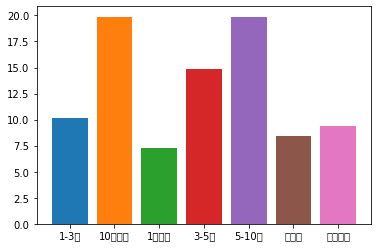

In [8]:
# 5. 工作年年限进行分组，然后对比不同年限的平均薪资

# 将薪资为面议去除
#薪资面议 北京数据分析工资占比的情况 (20k一下,30-50 )
df = df[df['平均薪资']!='薪资面议']

import matplotlib.pyplot as plt


groups = df.groupby(by='年限')
xticks = []

for group_name,group_df in groups:
    
    xticks.append(group_name)
    #group_df['平均薪资'].mean()  将平均薪资作为 柱状图显示
    
    plt.bar(group_name,group_df['平均薪资'].mean())
    
plt.xticks(xticks)
plt.show()

/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22763 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/wanglaoyi/opt/anaconda3/lib/python3.8/

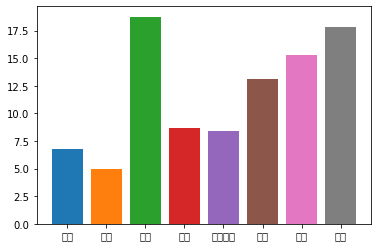

In [9]:
# 6. 按学历进行分组，然后对比不同学历的平均薪资
import matplotlib.pyplot as plt

#数据源 大专的,比博士还高  去除太多 薪资面议
#
groups = df.groupby(by='学历')
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    
    plt.bar(group_name,group_df['平均薪资'].mean())
    
plt.xticks(xticks)
plt.show()

In [ ]:
# 7. 获取各地区的最低薪资和最高薪资
#城市的底线和上线
import numpy as np
# 按照各个地区进行分组
position_groups = df.groupby(by='位置')
positionList = []
positionlowList = []
positionhighList = []
posotionvagList = []

def groupfunction(groupname,group):
    #上海,北京拼接到数组里面
    positionList.append(groupname)
    # 去除面议的后进行排序
    #for value in group['平均薪资'].values.tolist() 为什么判断在后面
    #if '面议' not in str(value) 如果不是面议的话 15k还是15k
    result =[value for value in group['平均薪资'].values.tolist() if '面议' not in str(value)]
    # 拆解列表生成式 for 
    #sorted 默认从低祷告 [1k -- 100k]
    #取出最高工资
    positionhighList.append(sorted(result)[-1])
    #取出最低工资
    positionlowList.append(sorted(result)[0])
    #这个城市的平均薪资
    posotionvagList.append(np.mean(result))
# 将每个组中的数据数据按平均薪资排序
for groupname,group in position_groups:
    #group m每个城市薪资的数据 100k 1k 自定义方法 找寻最低薪资最高薪资
    groupfunction(groupname,group)

import matplotlib.pyplot as plt
import numpy as np
#正常情况 显示中文, fontmanager :扩展来看 查询一下 字体有关 
#
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

index = np.arange(len(positionList))


plt.bar(index,positionlowList,width=0.3)

plt.bar(index+0.3,positionhighList,width=0.3,color='green')

plt.xticks(index+0.3/2,positionList)

plt.show()
#字体问题
print(posotionvagList)

In [ ]:
# 4. 每个城市的平均薪资
import matplotlib.pyplot as plt
plt.bar(positionList,posotionvagList)
plt.show()
#按照不同列分组完成不同的情况
#2个小时 